In [128]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [2]:
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
#mpl.use('png')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
df = pd.read_csv('room_occ.csv')

df.dropna(inplace=True)
df = df.drop('Light', axis=1)

pos = len(df[df['Occupancy']==1])
neg = len(df[df['Occupancy']==0])

print(f'positive examples: {pos}')
print(f'negative examples: {neg}')
print(f'total examples: {len(df)}')

df.head()

positive examples: 972
negative examples: 1693
total examples: 2665


,Temperature,Humidity,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,749.200000,0.004764,1
1,23.7180,26.290,760.400000,0.004773,1
2,23.7300,26.230,769.666667,0.004765,1
3,23.7225,26.125,774.750000,0.004744,1
4,23.7540,26.200,779.000000,0.004767,1


In [4]:
df.describe()

df.isnull().sum()

Temperature      0
Humidity         0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
# splitting data
X = df.drop('Occupancy', axis=1)

y = df['Occupancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

print(len(X_train), len(X_test))

2132 533


## K-Nearest Neigbors

**Default Model**

In [6]:
# start by checking accuracy with our default model

default_model = KNeighborsClassifier()

default_model.fit(X_train, y_train)

y_pred = default_model.predict(X_test)

In [7]:
default_accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'default accuracy: {default_accuracy}')

default accuracy: 0.8724202626641651


**Tuning**

In [8]:
neighbors = [x for x in range(1, 21)]

df_k = pd.DataFrame(columns=['k_neighbors', 'test_accuracy', 'train_accuracy'])

for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_k.loc[len(df_k.index)] = [neighbor, test_accuracy, train_accuracy]
    
df_k

,k_neighbors,test_accuracy,train_accuracy
0,1.0,0.889306,1.000000
1,2.0,0.859287,0.948405
2,3.0,0.881801,0.934803
3,4.0,0.879925,0.922139
4,5.0,0.872420,0.908068
5,6.0,0.868668,0.898218
6,7.0,0.872420,0.892589
7,8.0,0.870544,0.890244
8,9.0,0.872420,0.885084
9,10.0,0.870544,0.885084


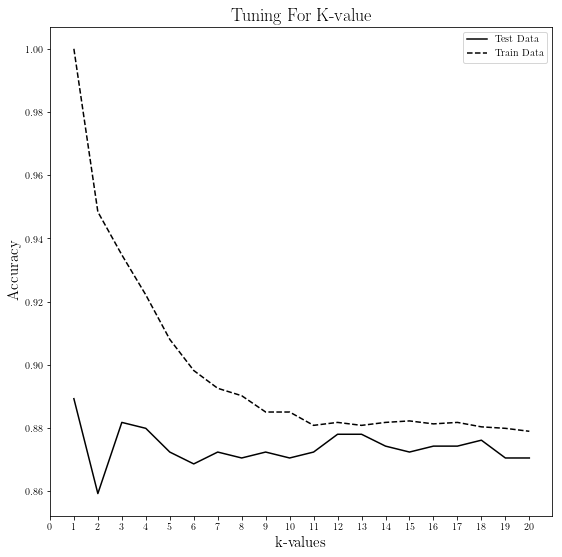

In [9]:
plt.figure(figsize=(9,9))

plt.plot(df_k['k_neighbors'], df_k['test_accuracy'], label='Test Data', color='black')
plt.plot(df_k['k_neighbors'], df_k['train_accuracy'], linestyle='dashed', label='Train Data', color='black')
plt.xlabel('k-values', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks([x for x in range(21)])
plt.title('Tuning For K-value', fontsize=18)
plt.legend()

plt.savefig('k_val.png')

plt.show()

In [10]:
p_vals = [1, 2]

df_dist = pd.DataFrame(columns=['dist', 'test_accuracy', 'train_accuracy'])

for p_val in p_vals:
    model = KNeighborsClassifier(n_neighbors=1, p=p_val)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_dist.loc[len(df_dist.index)] = [p_val, test_accuracy, train_accuracy]
    
df_dist

,dist,test_accuracy,train_accuracy
0,1.0,0.900563,1.0
1,2.0,0.889306,1.0


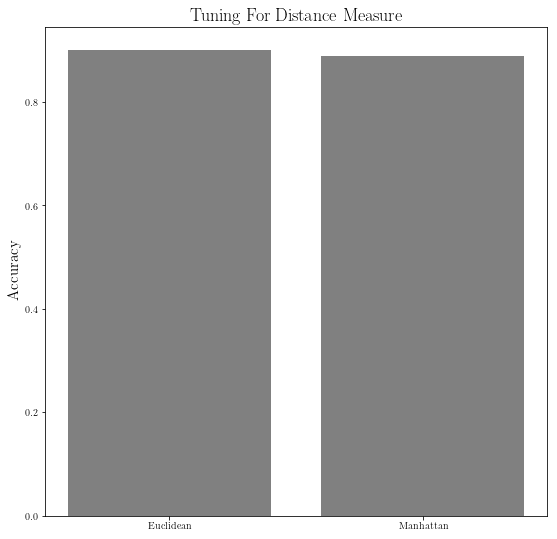

In [11]:
plt.figure(figsize=(9,9))

x = ['Euclidean', 'Manhattan']

plt.bar(x, df_dist['test_accuracy'], color='grey')
plt.ylabel('Accuracy', fontsize=15)
plt.title('Tuning For Distance Measure', fontsize=18)

plt.savefig('dist.png')

plt.show()

In [12]:
n_neighbors = list(range(1,18))
p=[1,2]
weights=['uniform', 'distance']


hyperparameters = dict(n_neighbors=n_neighbors, p=p, weights=weights)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

optimal_model = clf.fit(X_train, y_train)

print('Best weights:', optimal_model.best_estimator_.get_params()['weights'])
print('Best p:', optimal_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', optimal_model.best_estimator_.get_params()['n_neighbors'])

Best weights: uniform
Best p: 1
Best n_neighbors: 1


**Optimal Model**

In [13]:
model = KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(test_accuracy)

0.900562851782364


In [14]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       335
           1       0.84      0.90      0.87       198

   micro avg       0.90      0.90      0.90       533
   macro avg       0.89      0.90      0.89       533
weighted avg       0.90      0.90      0.90       533



In [15]:
df_pos = df[df['Occupancy']==1]
df_neg = df[df['Occupancy']==0]

print(df_pos.columns)

df_neg.describe()

Index(['Temperature', 'Humidity', 'CO2', 'HumidityRatio', 'Occupancy'], dtype='object')


,Temperature,Humidity,CO2,HumidityRatio,Occupancy
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.0
mean,20.884211,24.226417,547.613497,0.003703,0.0
std,0.559707,1.797429,153.219351,0.000378,0.0
min,20.200000,22.100000,427.500000,0.003303,0.0
25%,20.575000,22.550000,449.750000,0.003345,0.0
50%,20.700000,24.200000,479.250000,0.003661,0.0
75%,21.000000,25.050000,576.500000,0.003846,0.0
max,23.290000,30.122500,1205.250000,0.005114,0.0


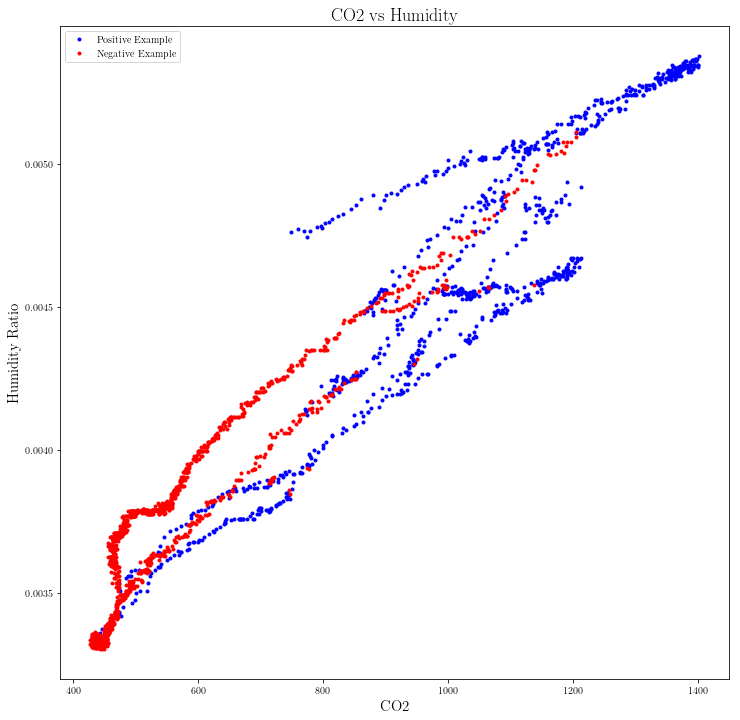

In [16]:
plt.figure(figsize=(12,12))

plt.plot(df_pos['CO2'], df_pos['HumidityRatio'], '.', color='b', label='Positive Example')
plt.plot(df_neg['CO2'], df_neg['HumidityRatio'], '.', color='r', label='Negative Example')

plt.xlabel('CO2', fontsize=15)
plt.ylabel('Humidity Ratio', fontsize=15)
plt.title('CO2 vs Humidity', fontsize=18)
plt.legend()

plt.show()

## Logistic Regression

**Defualt Model**

In [77]:
log_model = LogisticRegression(solver='liblinear', max_iter=500)

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.8780487804878049


**Tuning**

In [78]:
penalty = ['l1', 'l2']

df_pen = pd.DataFrame(columns=['penalty', 'test_accuracy', 'train_accuracy'])

for pen in penalty:
    model = LogisticRegression(penalty=pen, solver='liblinear', max_iter=500)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_pen.loc[len(df_pen.index)] = [pen, test_accuracy, train_accuracy]
    
df_pen

,penalty,test_accuracy,train_accuracy
0,l1,0.887430,0.887899
1,l2,0.878049,0.887430


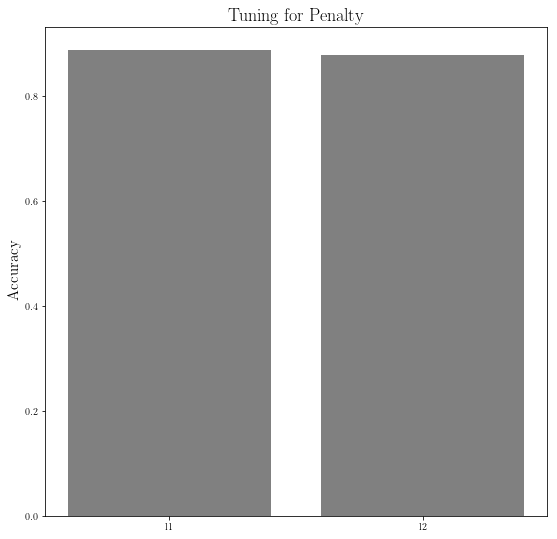

In [79]:
plt.figure(figsize=(9,9))

x = ['l1', 'l2']

plt.bar(x, df_pen['test_accuracy'], color='grey')
plt.ylabel('Accuracy', fontsize=15)
plt.title('Tuning for Penalty', fontsize=18)

plt.savefig('penalty.png')

plt.show()

In [105]:
c_val = [x for x in range(1, 10)]

df_c = pd.DataFrame(columns=['c_val', 'test_accuracy', 'train_accuracy'])

for c in c_val:
    model = LogisticRegression(C=c, solver='liblinear', max_iter=500)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_c.loc[len(df_c.index)] = [c, test_accuracy, train_accuracy]
    
df_c.head()

,c_val,test_accuracy,train_accuracy
0,1.0,0.878049,0.887430
1,2.0,0.879925,0.887899
2,3.0,0.883677,0.887430
3,4.0,0.885553,0.886492
4,5.0,0.887430,0.886961


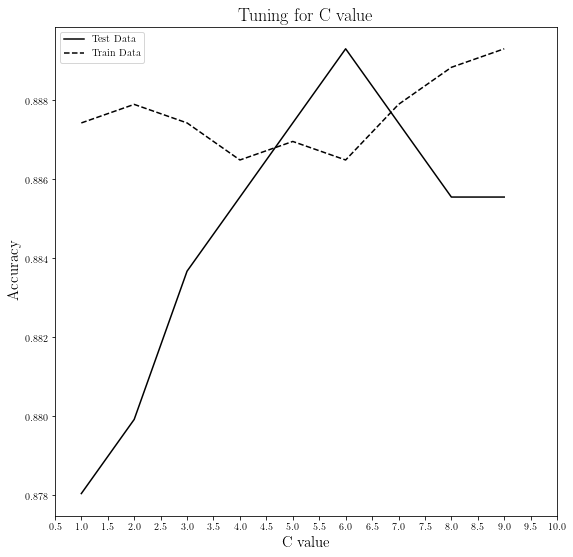

In [106]:
plt.figure(figsize=(9,9))

plt.plot(df_c['c_val'], df_c['test_accuracy'], label='Test Data', color='black')
plt.plot(df_c['c_val'], df_c['train_accuracy'], linestyle='dashed', label='Train Data', color='black')
plt.xlabel('C value', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks([x*.5 for x in range(1, 21)])
plt.title('Tuning for C value', fontsize=18)
plt.legend()

plt.savefig('c_val1.png')

plt.show()

An odd result with testing data being higher than training data. Because of this we try another split to see if there is anything funky going on or if this is coincidental.

In [83]:
# splitting data
X_2 = df.drop('Occupancy', axis=1)

y_2 = df['Occupancy']

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

print(len(X2_train), len(X2_test))

2132 533


In [112]:
c_val = [x*.5 for x in range(1, 21)]

df_c = pd.DataFrame(columns=['c_val', 'test_accuracy', 'train_accuracy'])

for c in c_val:
    model = LogisticRegression(C=c, solver='liblinear', max_iter=500)
    model.fit(X2_train, y2_train)
    
    y2_pred = model.predict(X2_test)
    y2_train_pred = model.predict(X2_train)
    test_accuracy = metrics.accuracy_score(y2_test, y2_pred)
    train_accuracy = metrics.accuracy_score(y2_train, y2_train_pred)
    
    df_c.loc[len(df_c.index)] = [c, test_accuracy, train_accuracy]
    
df_c.head()

,c_val,test_accuracy,train_accuracy
0,0.5,0.879925,0.887899
1,1.0,0.879925,0.887430
2,1.5,0.879925,0.888368
3,2.0,0.879925,0.888368
4,2.5,0.879925,0.886961


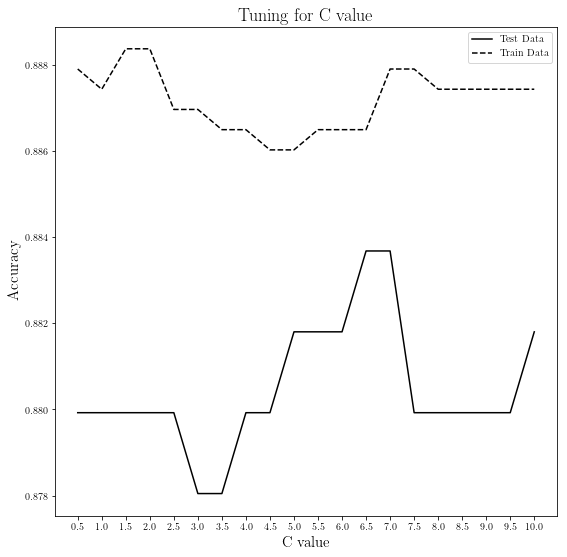

In [113]:
plt.figure(figsize=(9,9))

plt.plot(df_c['c_val'], df_c['test_accuracy'], label='Test Data', color='black')
plt.plot(df_c['c_val'], df_c['train_accuracy'], linestyle='dashed', label='Train Data', color='black')
plt.xlabel('C value', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks([x*.5 for x in range(1, 21)])
plt.title('Tuning for C value', fontsize=18)
plt.legend()

plt.savefig('c_val2.png')

plt.show()

In [108]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

df_solv = pd.DataFrame(columns=['solver', 'test_accuracy', 'train_accuracy'])

for solv in solvers:
    model = LogisticRegression(solver=solv, max_iter=500)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_solv.loc[len(df_solv.index)] = [solv, test_accuracy, train_accuracy]
    
df_solv.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,solver,test_accuracy,train_accuracy
0,newton-cg,0.891182,0.894934
1,lbfgs,0.891182,0.894934
2,liblinear,0.878049,0.887430
3,sag,0.879925,0.878049
4,saga,0.879925,0.876173


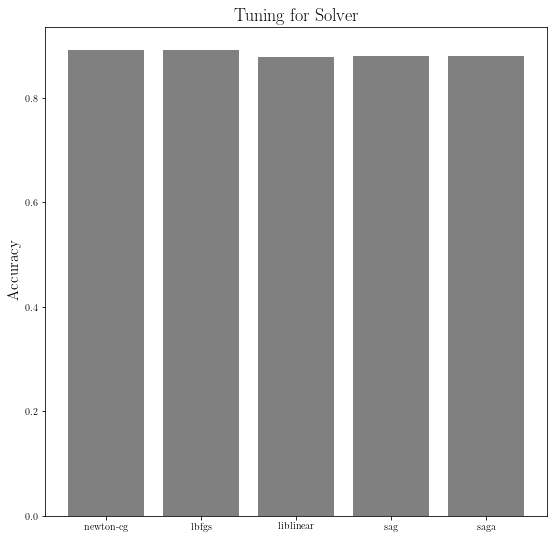

In [109]:
plt.figure(figsize=(9,9))

x = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

plt.bar(x, df_solv['test_accuracy'], color='grey')
plt.ylabel('Accuracy', fontsize=15)
plt.title('Tuning for Solver', fontsize=18)

plt.savefig('solver.png')

plt.show()

In [95]:
# Grid Search

C = [x*.5 for x in range(1, 21)]
penalty=['l1', 'l2']


hyperparameters = dict(C=C, penalty=penalty)

lr_2 = LogisticRegression(solver='liblinear', max_iter=500)

clf = GridSearchCV(lr_2, hyperparameters, cv=10)

optimal_model_2 = clf.fit(X2_train, y2_train)

print('Best penalty:', optimal_model_2.best_estimator_.get_params()['penalty'])
print('Best C:', optimal_model_2.best_estimator_.get_params()['C'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Version

Best penalty: l1
Best C: 2.5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [98]:
# Grid Search

C = [x*.5 for x in range(1, 21)]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


hyperparameters = dict(C=C, solver=solver)

lr_2 = LogisticRegression(max_iter=500)

clf = GridSearchCV(lr_2, hyperparameters, cv=10)

optimal_model_2 = clf.fit(X2_train, y2_train)

print('Best solver:', optimal_model_2.best_estimator_.get_params()['solver'])
print('Best C:', optimal_model_2.best_estimator_.get_params()['C'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frame

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frame

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Fra

Best solver: newton-cg
Best C: 1.0


**Optimal Model**

In [100]:
model = LogisticRegression(penalty='l1', C=2.5, max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(test_accuracy)

0.8874296435272045


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [101]:
model = LogisticRegression(penalty='l2', C=1, solver='newton-cg', max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(test_accuracy)

0.8911819887429644


## Naive Bayes

**Default Model**

In [17]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.8630393996247655


**Tuning**

In [174]:
smoothing = [.0000000001, .000000001, .00000001, .0000001, .000001, .00001, .0001, .001, .01, .1, 1]

df_smooth = pd.DataFrame(columns=['smooth', 'test_accuracy', 'train_accuracy'])

for smooth in smoothing:
    model = GaussianNB(var_smoothing=smooth)
    model.fit(X2_train, y2_train)
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    test_accuracy = metrics.accuracy_score(y_test, y_pred)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    
    df_smooth.loc[len(df_smooth.index)] = [smooth, test_accuracy, train_accuracy]

    
maximum_ind = max(df_smooth['test_accuracy'])
print(f'max: {maximum_ind}')
df_smooth

max: 0.8799249530956847


,smooth,test_accuracy,train_accuracy
0,1.000000e-10,0.866792,0.863508
1,1.000000e-09,0.866792,0.863508
2,1.000000e-08,0.866792,0.863508
3,1.000000e-07,0.866792,0.863977
4,1.000000e-06,0.866792,0.864447
5,1.000000e-05,0.874296,0.867730
6,1.000000e-04,0.870544,0.871951
7,1.000000e-03,0.878049,0.873827
8,1.000000e-02,0.879925,0.874765
9,1.000000e-01,0.872420,0.873358


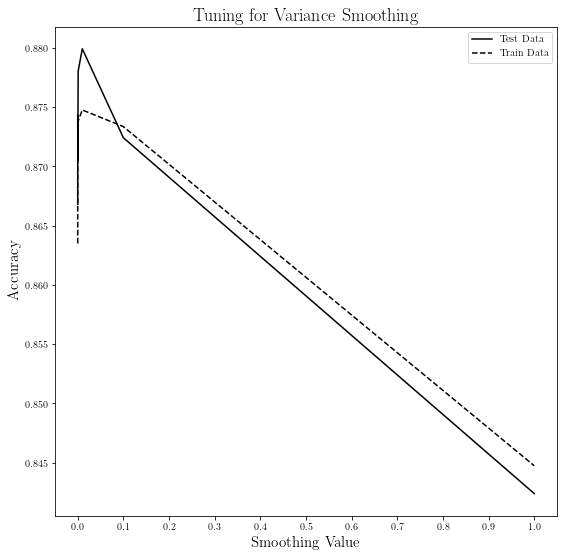

In [176]:
plt.figure(figsize=(9,9))

plt.plot(df_smooth['smooth'], df_smooth['test_accuracy'], label='Test Data', color='black')
plt.plot(df_smooth['smooth'], df_smooth['train_accuracy'], linestyle='dashed', label='Train Data', color='black')
plt.xlabel('Smoothing Value', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
plt.title('Tuning for Variance Smoothing', fontsize=18)
plt.legend()

plt.savefig('smooth.png')

plt.show()

**Optimal Model**

In [171]:
nb_model = GaussianNB(var_smoothing=(1*(10**(-3))))

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.8780487804878049


## Conclusion

In [177]:
df_conclusion = pd.DataFrame({'Model': ['K-nearest Neighbors', 'Logistic Regression', 'Naive Bayes'], 'Base Model': [.8724, .8780, .8630], 'Tuned Model': [.9005, .8912, .8780]})

df_conclusion

,Model,Base Model,Tuned Model
0,K-nearest Neighbors,0.8724,0.9005
1,Logistic Regression,0.8780,0.8912
2,Naive Bayes,0.8630,0.8780


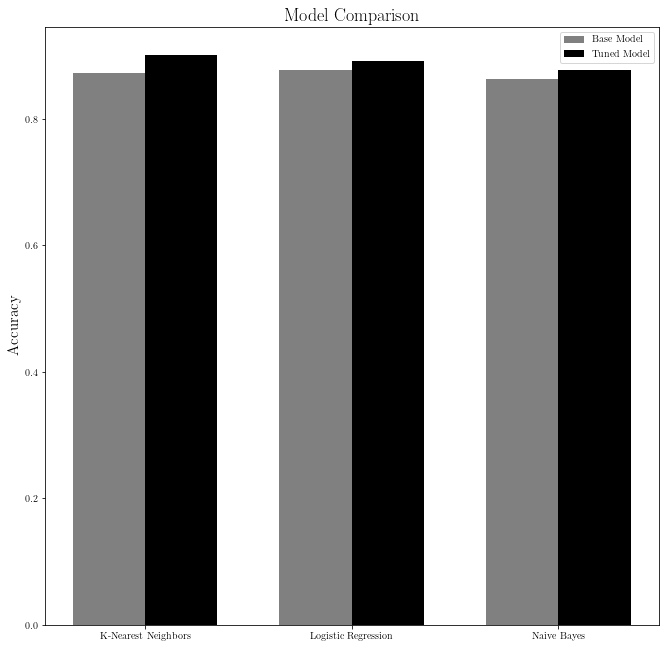

In [187]:
plt.figure(figsize=(11,11))

x = ['K-nearest Neighbors', 'Logistic Regression', 'Naive Bayes']
X = np.arange(3)

bar_width =.35

p1 = plt.bar(X, df_conclusion['Base Model'], bar_width, color='grey',
label='Base Model')

p2 = plt.bar(X + bar_width, df_conclusion['Tuned Model'], bar_width, color='black',
label='Tuned Model')

plt.ylabel('Accuracy', fontsize=15)
plt.xticks(X + (bar_width/2), ("K-Nearest Neighbors", "Logistic Regression", "Naive Bayes"))

plt.legend()
plt.title('Model Comparison', fontsize=18)

plt.savefig('conclusion.png')

plt.show()